# Batch Processing

This notebook shows examples for batch power flow and time-domain calculations. Readers are supposed to have read the previous examples, especially Example 7 for parallel simulations.

In [1]:
import andes
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import rcParams

Uncomment the following line to set verbosity level to WARNING to suppress some outputs. This is optional.

In [2]:
# andes.main.config_logger(stream_level=30)

## Batch Power Flow Calculation

Use the Kundur's system as the example. Suppose we want to calculate power flow for the same system structure but for different load levels.

In [3]:
kundur = andes.utils.get_case('kundur/kundur_full.xlsx')

In [4]:
ss = andes.run(kundur, no_output=True)

Working directory: "/home/hcui7/repos/andes/examples"
Loaded config from file "/home/hcui7/.andes/andes.rc"
Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0581 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0092 seconds.
-> Single process finished in 0.1387 seconds.


There are two PQ loads in the Kundur's system with `idx`es of `PQ_0` and `PQ_1`.

In [5]:
ss.PQ.as_df_in()

,idx,u,name,bus,Vn,p0,q0,vmax,vmin,owner
uid,,,,,,,,,,
0,PQ_0,1.0,None,7,230.0,11.59,-0.735,1.1,0.9,1
1,PQ_1,1.0,None,8,230.0,15.75,-0.899,1.1,0.9,1


If we have a range of active power for each load, such as 

In [6]:
n_samples = 10

pq0_values = np.linspace(10, 12, n_samples)
pq1_values = np.linspace(12, 18, n_samples)

where there are 50 samples for `PQ_0.p0` between `[10, 12]` and 50 samples for `PQ_1.p0` between `(12, 18)`.

we can use a for loop to set the load values and calculate power flow for each point.

Suppose we want to retrieve the voltage magnitude for each case, we use `v_results` the voltage results. Results that are not saved will be discarded.

In [7]:
v_results = np.zeros((ss.Bus.n, n_samples ** 2))
idx = 0

for ii in pq0_values:
    for jj in pq1_values:
        
        ss.PQ.alter("p0", "PQ_0", ii)
        ss.PQ.alter("p0", "PQ_1", jj)

        ss.PFlow.run()
        v_results[:, idx] = ss.dae.y[ss.Bus.v.a]
        
        idx += 1


-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.77482   
2: |F(x)| = 0.140158  
3: |F(x)| = 0.000320103
4: |F(x)| = 5.56016e-09
Converged in 5 iterations in 0.0094 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.74598   
2: |F(x)| = 0.134765  
3: |F(x)| = 0.000358839
4: |F(x)| = 8.23108e-09
Converged in 5 iterations in 0.0092 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.71785   
2: |F(x)| = 0.140367  
3: |F(x)| = 0.000584527
4: |F(x)| = 1.74663e-08
Converged in 5 iterations in 0.0126 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.69041   
2: |F(x)| = 0.164223  
3: |F(x)| = 0.000955793
4: |F(x)| = 5.4734e-08
Converged in 5 iterations in 0.0099 seconds.




-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.68481   
2: |F(x)| = 0.162124  
3: |F(x)| = 0.00100127
4: |F(x)| = 6.43482e-08
Converged in 5 iterations in 0.0086 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.65811   
2: |F(x)| = 0.178065  
3: |F(x)| = 0.00145674
4: |F(x)| = 1.56541e-07
Converged in 5 iterations in 0.0126 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.63205   
2: |F(x)| = 0.184343  
3: |F(x)| = 0.00192299
4: |F(x)| = 2.99741e-07
Converged in 5 iterations in 0.0091 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.6066    
2: |F(x)| = 0.178632  
3: |F(x)| = 0.00231504
4: |F(x)| = 4.76008e-07
Converged in 5 iterations in 0.0102 seconds.

-> 


-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60122   
2: |F(x)| = 0.169099  
3: |F(x)| = 0.00217334
4: |F(x)| = 4.37206e-07
Converged in 5 iterations in 0.0094 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.57644   
2: |F(x)| = 0.148198  
3: |F(x)| = 0.00215135
4: |F(x)| = 4.82371e-07
Converged in 5 iterations in 0.0089 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.55222   
2: |F(x)| = 0.11604   
3: |F(x)| = 0.00170184
4: |F(x)| = 3.51097e-07
Converged in 5 iterations in 0.0074 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.52856   
2: |F(x)| = 0.116479  
3: |F(x)| = 0.000939374
4: |F(x)| = 1.31101e-07
Converged in 5 iterations in 0.0091 seconds.

->


-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.52339   
2: |F(x)| = 0.116969  
3: |F(x)| = 0.000657893
4: |F(x)| = 6.86986e-08
Converged in 5 iterations in 0.0082 seconds.


Let's plot the results.

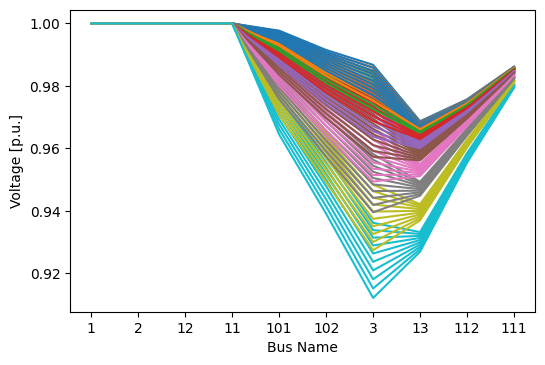

In [8]:
rcParams['figure.dpi'] = 100

lines = plt.plot(v_results)

xl = plt.xlabel('Bus Name')
yl = plt.ylabel('Voltage [p.u.]')

tk = plt.xticks(np.arange(ss.Bus.n), ss.Bus.name.v)

One should be aware that the for-loop based approach is single-threaded. It does not take advantage of multi-core processors. 

If the total number of scenarios are huge, one should refer to Example 7 to save all scenarios to excel files and use multi-processing.

## Batch Time-Domain Simulation

The next example shows how to run batch time-domain simulations for different events.

Suppose we want to create one scenario for each line trip event, which is actuated through `Toggler`. For the same system, we want to add Togglers for each line, run the simulation, and save results.

In [9]:
kundur = andes.utils.get_case('kundur/kundur_full.xlsx')

We use `andes.load()` with `setup=False` to load the test case. 

**It is important to note that one must pass `setup=False` so that adding Togglers can be allowed.**

In [10]:
ss = andes.load(kundur, setup=False)

Loaded config from file "/home/hcui7/.andes/andes.rc"
Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0812 seconds.


All the available lines to trip are in `ss.Line.idx.v`:

In [11]:
idxes = ss.Line.idx.v

In [12]:
ss.Toggler.cache.df

,idx,u,name,model,dev,t
uid,,,,,,
0,1,1,Toggler_1,Line,Line_8,2


We use `ss.add()` to add two togglers for each line at 1 second and 1.1 seconds to simulate a line opening and closing. `ss.add()` takes a model name, "Toggler", as the positional argument, and a dictionary for the Toggler device parameters.

A note for this particular test case is that `kundur_full.xlsx` already comes with a `Toggler` with `idx==1`. To not to interfere with our scenarios, we need to disable it using `ss.Toggler.alter`.

After adding Toggler devices, we need to manually call `ss.setup()` to finish the data structure setup. Then, power flow and time-domain simulation can be performed. 

We store the results in a dictionary where keys are the line names and values are the systems. Code is as follows.

In [13]:
results = dict()

for idx in idxes:
    ss = andes.load(kundur, setup=False)
    
    ss.add('Toggler', dict(model="Line", dev=idx, t=1.0))
    ss.add('Toggler', dict(model="Line", dev=idx, t=1.1))
    
    ss.setup()  # no `ss.add()` calls are allowed after setup()
    ss.Toggler.alter('u', 1, 0.0)  # disable the existing toggler with idx=1 (this is for the particular case)

    ss.PFlow.run()
    ss.TDS.config.tf = 5  # simulate for 5 seconds to save time
    ss.TDS.run()
    
    results[idx] = ss

Loaded config from file "/home/hcui7/.andes/andes.rc"
Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0521 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0073 seconds.
Report saved to "kundur_full_out.txt" in 0.0006 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-5 sec.
Fixed step size: h=33.33 msec., shrink if not converged
Initialization was successful in 0.0181 seconds.


<Toggler Toggler_2>: Line.Line_0 status changed to 0 at t=1.0 sec.    
<Toggler Toggler_3>: Line.Line_0 status changed to 1 at t=1.1 sec.    
100%|███████████████████████████████| 100/100 [00:00<00:00, 201.93%/s]

Simulation completed in 0.4958 seconds.
TDS outputs saved in 0.0069 seconds.
Loaded config from file "/home/hcui7/.andes/andes.rc"


Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0454 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0076 seconds.
Report saved to "kundur_full_out.txt" in 0.0006 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-5 sec.
Fixed step size: h=33.33 msec., shrink if not converged
Initialization was successful in 0.0174 seconds.


<Toggler Toggler_2>: Line.Line_1 status changed to 0 at t=1.0 sec.    
<Toggler Toggler_3>: Line.Line_1 status changed to 1 at t=1.1 sec.    
100%|███████████████████████████████| 100/100 [00:00<00:00, 204.51%/s]

Simulation completed in 0.4895 seconds.
TDS outputs saved in 0.0116 seconds.


Loaded config from file "/home/hcui7/.andes/andes.rc"
Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0530 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0094 seconds.
Report saved to "kundur_full_out.txt" in 0.0009 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-5 sec.
Fixed step size: h=33.33 msec., shrink if not converged
Initialization was successful in 0.0194 seconds.


<Toggler Toggler_2>: Line.Line_2 status changed to 0 at t=1.0 sec.    
<Toggler Toggler_3>: Line.Line_2 status changed to 1 at t=1.1 sec.    
100%|███████████████████████████████| 100/100 [00:00<00:00, 205.68%/s]

Simulation completed in 0.4867 seconds.
TDS outputs saved in 0.0076 seconds.
Loaded config from file "/home/hcui7/.andes/andes.rc"


Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0476 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0124 seconds.
Report saved to "kundur_full_out.txt" in 0.0014 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-5 sec.
Fixed step size: h=33.33 msec., shrink if not converged
Initialization was successful in 0.0187 seconds.


<Toggler Toggler_2>: Line.Line_3 status changed to 0 at t=1.0 sec.    
<Toggler Toggler_3>: Line.Line_3 status changed to 1 at t=1.1 sec.    
100%|███████████████████████████████| 100/100 [00:00<00:00, 200.25%/s]

Simulation completed in 0.5000 seconds.
TDS outputs saved in 0.0067 seconds.
Loaded config from file "/home/hcui7/.andes/andes.rc"


Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0464 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0080 seconds.
Report saved to "kundur_full_out.txt" in 0.0006 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-5 sec.
Fixed step size: h=33.33 msec., shrink if not converged
Initialization was successful in 0.0176 seconds.


<Toggler Toggler_2>: Line.Line_4 status changed to 0 at t=1.0 sec.    
<Toggler Toggler_3>: Line.Line_4 status changed to 1 at t=1.1 sec.    
100%|███████████████████████████████| 100/100 [00:00<00:00, 241.34%/s]

Simulation completed in 0.4152 seconds.
TDS outputs saved in 0.0069 seconds.
Loaded config from file "/home/hcui7/.andes/andes.rc"


Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0465 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0076 seconds.
Report saved to "kundur_full_out.txt" in 0.0014 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-5 sec.
Fixed step size: h=33.33 msec., shrink if not converged
Initialization was successful in 0.0179 seconds.


<Toggler Toggler_2>: Line.Line_5 status changed to 0 at t=1.0 sec.    
<Toggler Toggler_3>: Line.Line_5 status changed to 1 at t=1.1 sec.    
100%|███████████████████████████████| 100/100 [00:00<00:00, 236.66%/s]

Simulation completed in 0.4232 seconds.
TDS outputs saved in 0.0077 seconds.
Loaded config from file "/home/hcui7/.andes/andes.rc"
Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"


Input file parsed in 0.1006 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0077 seconds.
Report saved to "kundur_full_out.txt" in 0.0006 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-5 sec.
Fixed step size: h=33.33 msec., shrink if not converged
Initialization was successful in 0.0188 seconds.


<Toggler Toggler_2>: Line.Line_6 status changed to 0 at t=1.0 sec.    
<Toggler Toggler_3>: Line.Line_6 status changed to 1 at t=1.1 sec.    
100%|███████████████████████████████| 100/100 [00:00<00:00, 239.79%/s]

Simulation completed in 0.4179 seconds.
TDS outputs saved in 0.0069 seconds.
Loaded config from file "/home/hcui7/.andes/andes.rc"
Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"


Input file parsed in 0.0465 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0081 seconds.
Report saved to "kundur_full_out.txt" in 0.0010 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-5 sec.
Fixed step size: h=33.33 msec., shrink if not converged
Initialization was successful in 0.0172 seconds.


<Toggler Toggler_2>: Line.Line_7 status changed to 0 at t=1.0 sec.    
<Toggler Toggler_3>: Line.Line_7 status changed to 1 at t=1.1 sec.    
100%|███████████████████████████████| 100/100 [00:00<00:00, 210.19%/s]

Simulation completed in 0.4765 seconds.
TDS outputs saved in 0.0072 seconds.
Loaded config from file "/home/hcui7/.andes/andes.rc"


Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0489 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0088 seconds.
Report saved to "kundur_full_out.txt" in 0.0011 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-5 sec.
Fixed step size: h=33.33 msec., shrink if not converged
Initialization was successful in 0.0210 seconds.


<Toggler Toggler_2>: Line.Line_8 status changed to 0 at t=1.0 sec.    
<Toggler Toggler_3>: Line.Line_8 status changed to 1 at t=1.1 sec.    
100%|███████████████████████████████| 100/100 [00:00<00:00, 196.36%/s]

Simulation completed in 0.5099 seconds.
TDS outputs saved in 0.0073 seconds.
Loaded config from file "/home/hcui7/.andes/andes.rc"


Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0490 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0084 seconds.
Report saved to "kundur_full_out.txt" in 0.0012 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-5 sec.
Fixed step size: h=33.33 msec., shrink if not converged
Initialization was successful in 0.0190 seconds.


<Toggler Toggler_2>: Line.Line_9 status changed to 0 at t=1.0 sec.    
<Toggler Toggler_3>: Line.Line_9 status changed to 1 at t=1.1 sec.    
100%|███████████████████████████████| 100/100 [00:00<00:00, 204.99%/s]

Simulation completed in 0.4885 seconds.
TDS outputs saved in 0.0072 seconds.
Loaded config from file "/home/hcui7/.andes/andes.rc"


Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0467 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0086 seconds.
Report saved to "kundur_full_out.txt" in 0.0013 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-5 sec.
Fixed step size: h=33.33 msec., shrink if not converged
Initialization was successful in 0.0188 seconds.


<Toggler Toggler_2>: Line.Line_10 status changed to 0 at t=1.0 sec.   
<Toggler Toggler_3>: Line.Line_10 status changed to 1 at t=1.1 sec.   
100%|███████████████████████████████| 100/100 [00:00<00:00, 207.98%/s]

Simulation completed in 0.4815 seconds.
TDS outputs saved in 0.0072 seconds.
Loaded config from file "/home/hcui7/.andes/andes.rc"


Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0526 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0100 seconds.
Report saved to "kundur_full_out.txt" in 0.0011 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-5 sec.
Fixed step size: h=33.33 msec., shrink if not converged
Initialization was successful in 0.0237 seconds.


<Toggler Toggler_2>: Line.Line_11 status changed to 0 at t=1.0 sec.   
<Toggler Toggler_3>: Line.Line_11 status changed to 1 at t=1.1 sec.   
* Max. iter. 15 reached for t=1.231767, h=0.033333, mis=5.024         
* Max. iter. 15 reached for t=1.231767, h=0.030000, mis=0.08469       
* Max. iter. 15 reached for t=1.231767, h=0.027000, mis=0.07205       
* Max. iter. 15 reached for t=1.231767, h=0.024300, mis=0.0611        
* Max. iter. 15 reached for t=1.231767, h=0.021870, mis=0.05165       
* Max. iter. 15 reached for t=1.231767, h=0.019683, mis=0.04353       
* Max. iter. 15 reached for t=1.231767, h=0.017715, mis=0.03658       
* Max. iter. 15 reached for t=1.274971, h=0.013669, mis=2.832         
100%|████████████████████████████████| 100/100 [00:09<00:00, 10.72%/s]

Simulation completed in 9.3286 seconds.
TDS outputs saved in 0.0417 seconds.
Loaded config from file "/home/hcui7/.andes/andes.rc"


Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"
Input file parsed in 0.0457 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0082 seconds.
Report saved to "kundur_full_out.txt" in 0.0009 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-5 sec.
Fixed step size: h=33.33 msec., shrink if not converged
Initialization was successful in 0.0154 seconds.


<Toggler Toggler_2>: Line.Line_12 status changed to 0 at t=1.0 sec.   
<Toggler Toggler_3>: Line.Line_12 status changed to 1 at t=1.1 sec.   
* Max. iter. 15 reached for t=1.100100, h=0.000100, mis=2.117         
 22%|███████                         | 22/100 [00:00<00:00, 144.67%/s]

Time step reduced to zero. Convergence is not likely.
Simulation terminated at t=1.1001.
Simulation completed in 0.1536 seconds.
TDS outputs saved in 0.0013 seconds.
Loaded config from file "/home/hcui7/.andes/andes.rc"
Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"


Input file parsed in 0.0458 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0079 seconds.
Report saved to "kundur_full_out.txt" in 0.0009 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-5 sec.
Fixed step size: h=33.33 msec., shrink if not converged
Initialization was successful in 0.0155 seconds.


<Toggler Toggler_2>: Line.Line_13 status changed to 0 at t=1.0 sec.   
<Toggler Toggler_3>: Line.Line_13 status changed to 1 at t=1.1 sec.   
* Max. iter. 15 reached for t=1.100100, h=0.000100, mis=4.071         
 22%|███████                         | 22/100 [00:00<00:00, 145.72%/s]

Time step reduced to zero. Convergence is not likely.
Simulation terminated at t=1.1001.
Simulation completed in 0.1524 seconds.
TDS outputs saved in 0.0012 seconds.
Loaded config from file "/home/hcui7/.andes/andes.rc"
Parsing input file "/home/hcui7/repos/andes/andes/cases/kundur/kundur_full.xlsx"


Input file parsed in 0.0459 seconds.

-> Power flow calculation
Sparse Solver: KLU
Method: NR method
Power flow initialized.
0: |F(x)| = 14.9283   
1: |F(x)| = 3.60858   
2: |F(x)| = 0.17009   
3: |F(x)| = 0.00203822
4: |F(x)| = 3.76399e-07
Converged in 5 iterations in 0.0082 seconds.
Report saved to "kundur_full_out.txt" in 0.0008 seconds.

-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0-5 sec.
Fixed step size: h=33.33 msec., shrink if not converged
Initialization was successful in 0.0149 seconds.


<Toggler Toggler_2>: Line.Line_14 status changed to 0 at t=1.0 sec.   
<Toggler Toggler_3>: Line.Line_14 status changed to 1 at t=1.1 sec.   
* Max. iter. 15 reached for t=1.231767, h=0.033333, mis=4.998         
* Max. iter. 15 reached for t=1.231767, h=0.030000, mis=0.08427       
* Max. iter. 15 reached for t=1.231767, h=0.027000, mis=0.0717        
* Max. iter. 15 reached for t=1.231767, h=0.024300, mis=0.0608        
* Max. iter. 15 reached for t=1.231767, h=0.021870, mis=0.0514        
* Max. iter. 15 reached for t=1.231767, h=0.019683, mis=0.04331       
* Max. iter. 15 reached for t=1.231767, h=0.017715, mis=0.0364        
* Max. iter. 15 reached for t=1.274971, h=0.013669, mis=2.817         
100%|████████████████████████████████| 100/100 [00:06<00:00, 14.92%/s]

Simulation completed in 6.7035 seconds.
TDS outputs saved in 0.0326 seconds.


Not all cases will solve due to system instability. For the converged cases, one can export the data or plot results following Example 1.

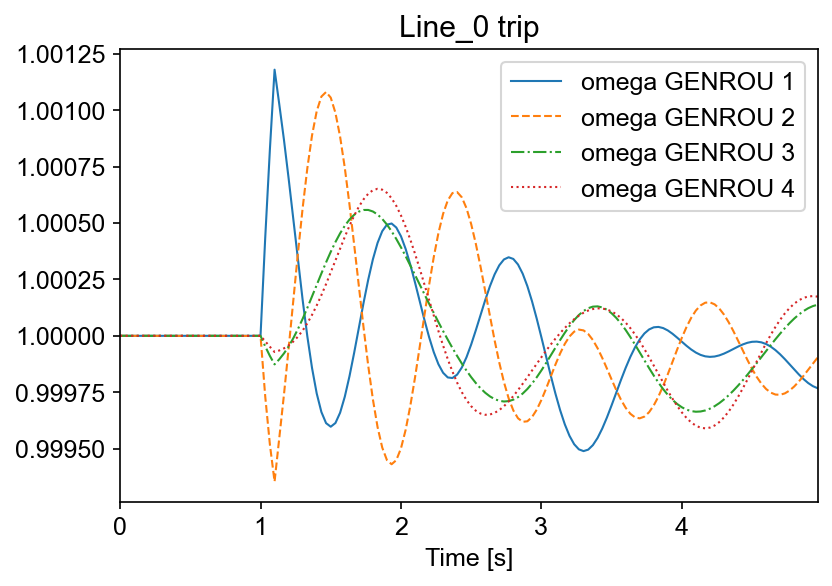

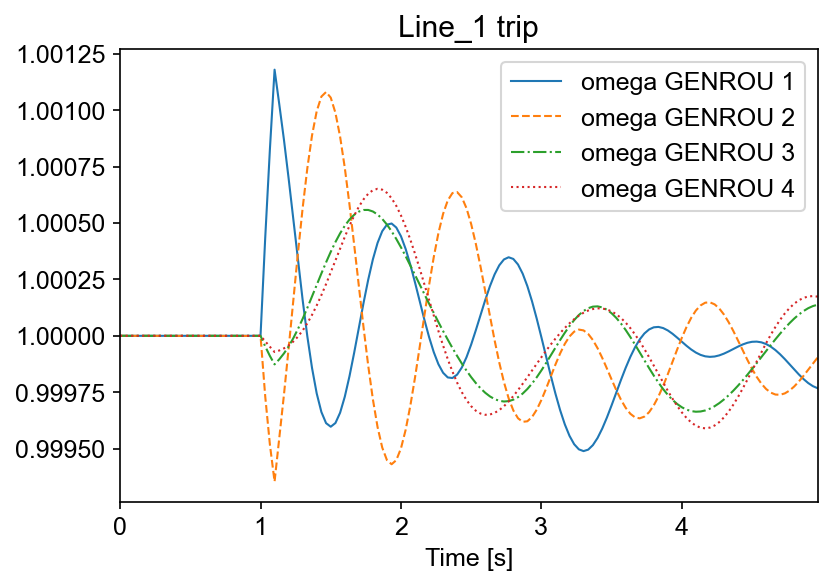

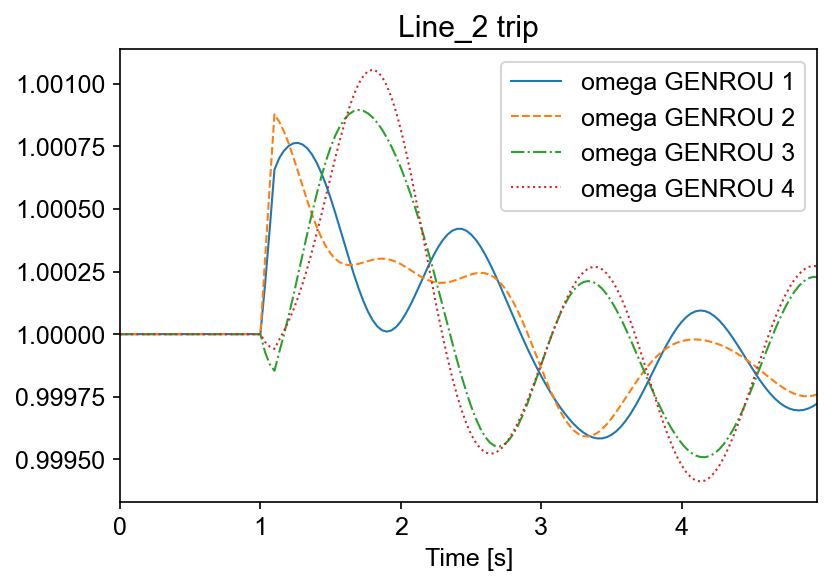

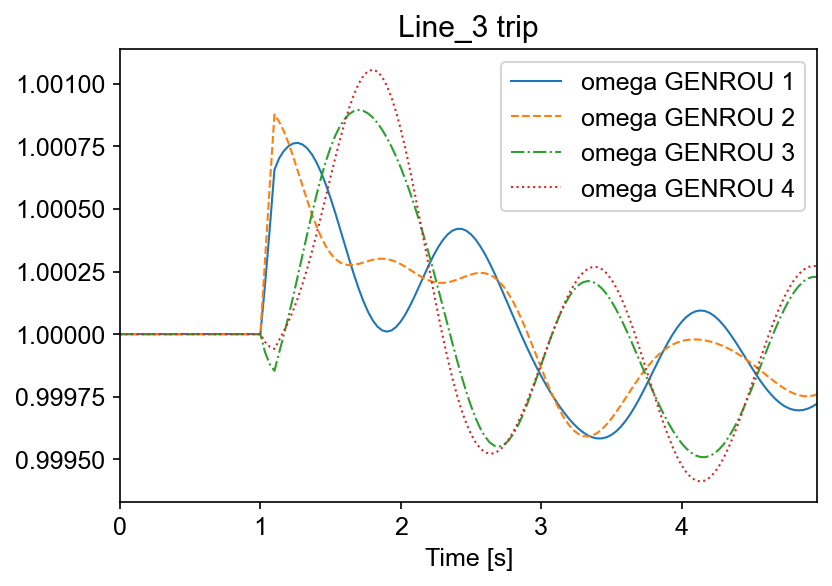

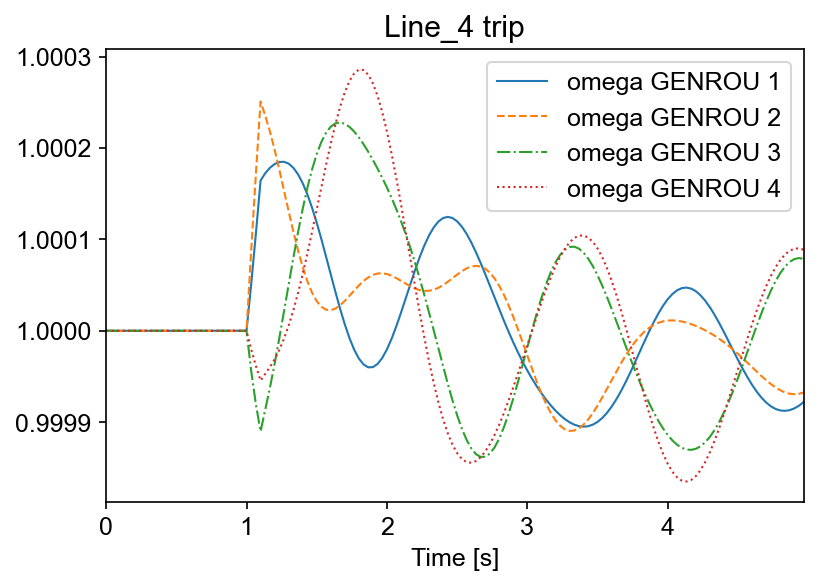

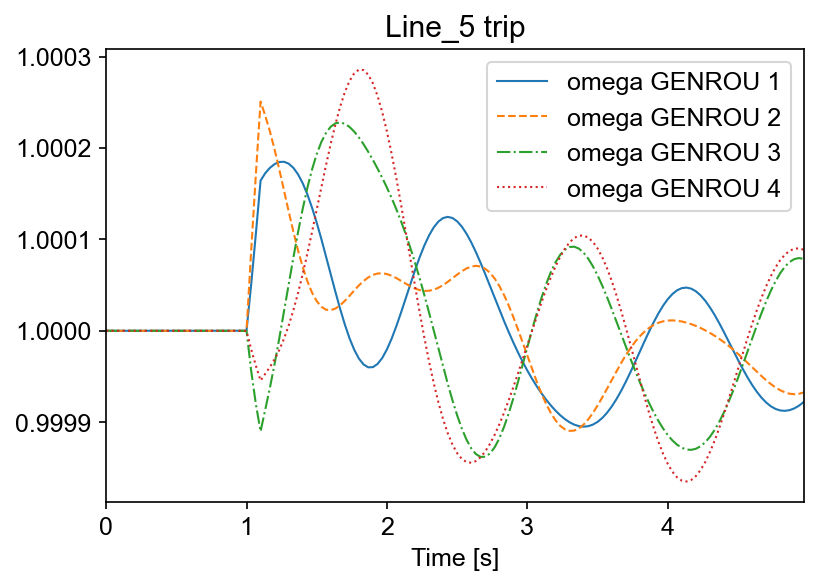

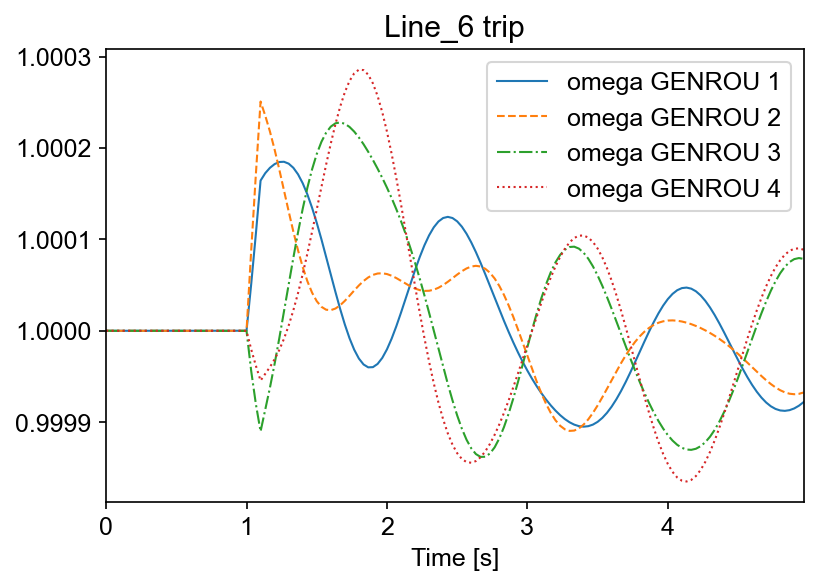

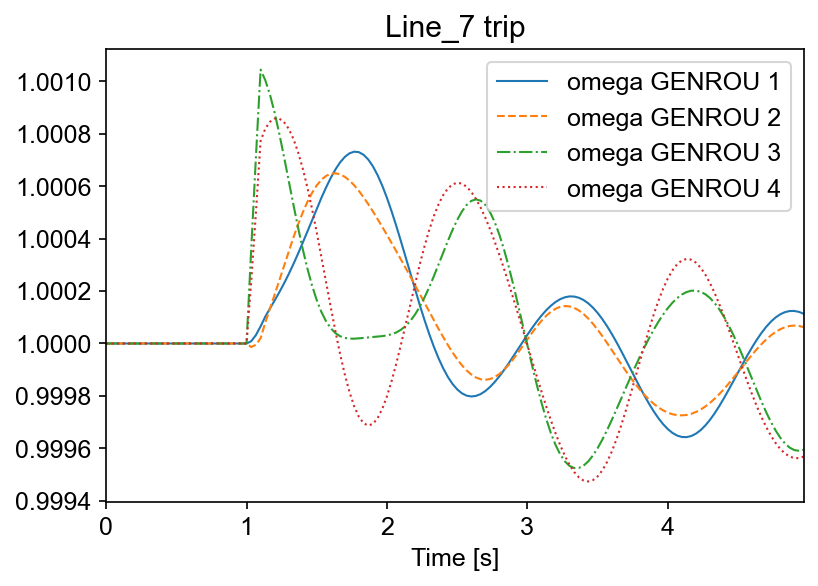

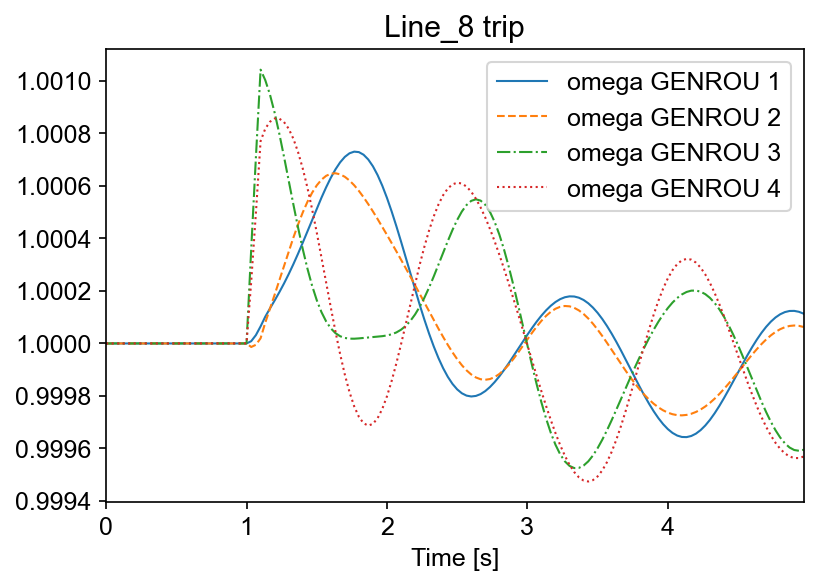

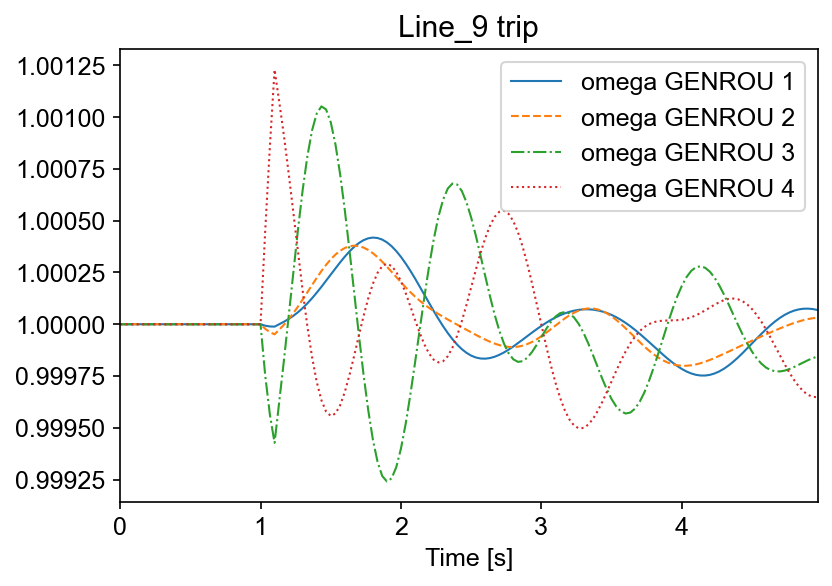

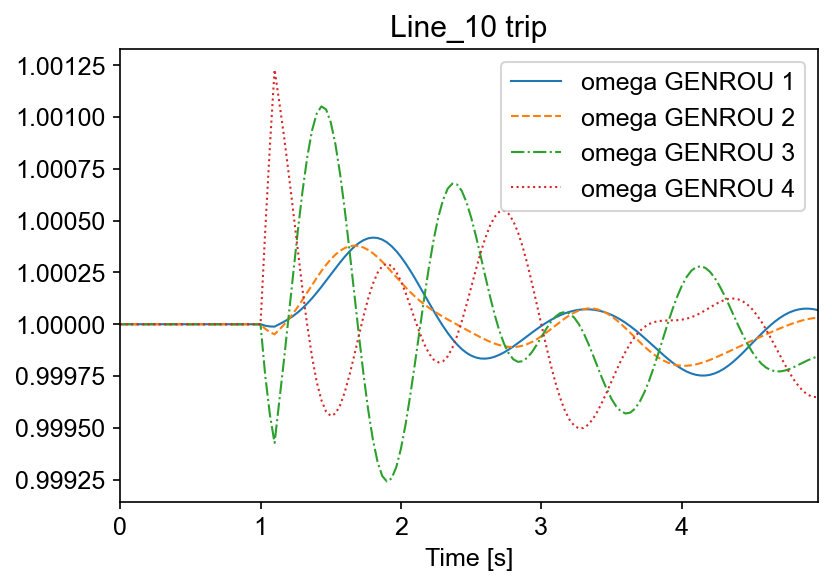

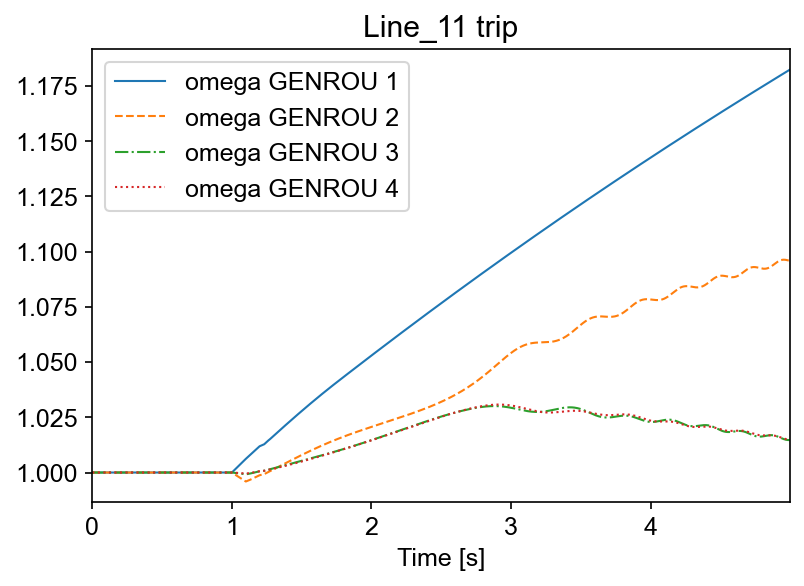

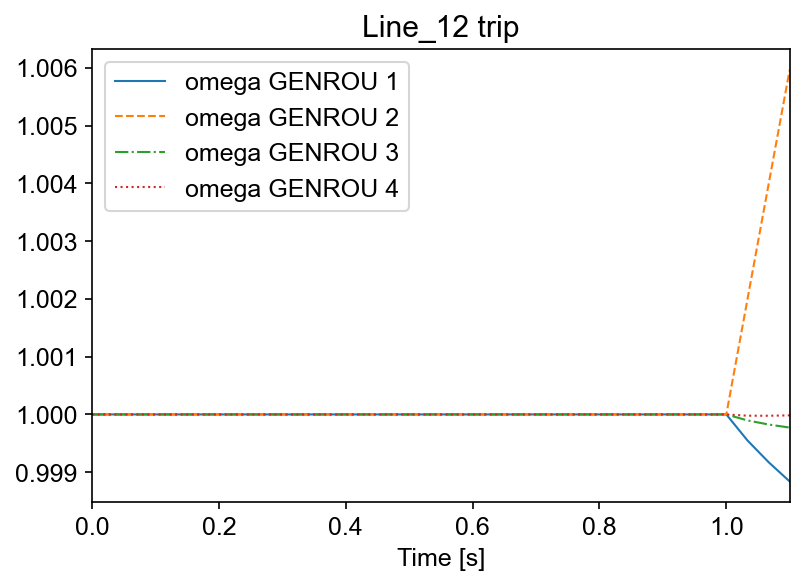

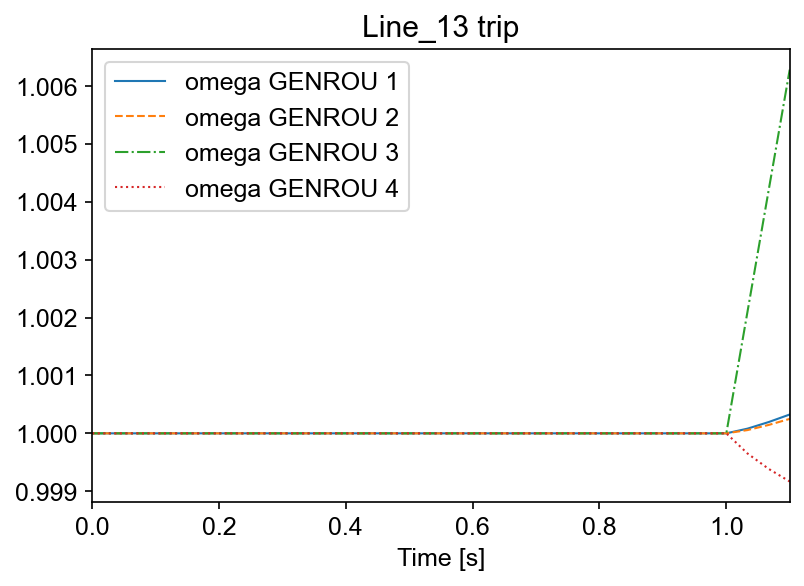

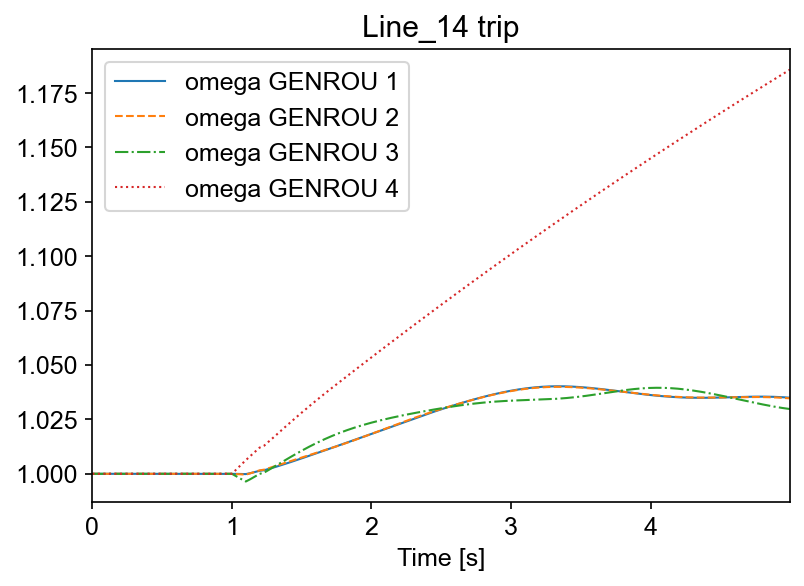

In [17]:
for idx, ss in results.items():
    ss.TDS.plt.plot(ss.GENROU.omega, title=f'{idx} trip', latex=False)